# Super Market Customer Behavior: Insights and Personalization Strategies

In [1]:
# Import pandas and numpy libraries
import pandas as pd
import numpy as np

In [2]:
# Import the dataset file into Jupiter as supermarket
supermarket = pd.read_excel("./Supermarket_Customer_Insights.xlsx")

In [3]:
# Dataframe overview
supermarket.head()

,CustomerID,Age,Gender,Annual_Income,Spending_Score,Product_Category,Purchase_Amount,Store_Visits,Membership_Status,Spending_Category
0,8270,62,Other,115000,16,Home & Living,99.44,8,Gold,Low
1,1860,18,Other,85000,79,Toys,66.39,5,Gold,High
2,6390,23,Male,105000,52,Electronics,53.51,6,Silver,Medium
3,6191,22,Other,45000,66,Groceries,14.14,2,Platinum,High
4,6734,62,Female,55000,6,Home & Living,84.43,4,Silver,Low


In [5]:
# Basic information about the dataset
print(supermarket.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Gender             10000 non-null  object 
 3   Annual_Income      10000 non-null  int64  
 4   Spending_Score     10000 non-null  int64  
 5   Product_Category   10000 non-null  object 
 6   Purchase_Amount    10000 non-null  float64
 7   Store_Visits       10000 non-null  int64  
 8   Membership_Status  10000 non-null  object 
 9   Spending_Category  10000 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None


In [6]:
# Display the first few rows of the dataset
print(supermarket.head())

   CustomerID  Age  Gender  Annual_Income  Spending_Score Product_Category  \
0        8270   62   Other         115000              16    Home & Living   
1        1860   18   Other          85000              79             Toys   
2        6390   23    Male         105000              52      Electronics   
3        6191   22   Other          45000              66        Groceries   
4        6734   62  Female          55000               6    Home & Living   

   Purchase_Amount  Store_Visits Membership_Status Spending_Category  
0            99.44             8              Gold               Low  
1            66.39             5              Gold              High  
2            53.51             6            Silver            Medium  
3            14.14             2          Platinum              High  
4            84.43             4            Silver               Low  


In [7]:
# Summary statistics for numerical columns
print(supermarket.describe())

         CustomerID           Age  Annual_Income  Spending_Score  \
count  10000.000000  10000.000000   10000.000000    10000.000000   
mean    5462.898000     43.449700   67941.000000       49.403700   
std     2589.212679     15.111873   28576.252015       28.675571   
min     1001.000000     18.000000   20000.000000        1.000000   
25%     3217.000000     31.000000   45000.000000       24.000000   
50%     5477.000000     43.000000   70000.000000       49.500000   
75%     7698.000000     57.000000   95000.000000       74.000000   
max     9998.000000     69.000000  115000.000000       99.000000   

       Purchase_Amount  Store_Visits  
count     10000.000000  10000.000000  
mean        100.363999      4.995900  
std          49.424151      2.223146  
min        -114.770000      0.000000  
25%          66.485000      3.000000  
50%         100.685000      5.000000  
75%         134.182500      6.000000  
max         276.830000     20.000000  


In [8]:
# Check for missing values
print(supermarket.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Annual_Income        0
Spending_Score       0
Product_Category     0
Purchase_Amount      0
Store_Visits         0
Membership_Status    0
Spending_Category    0
dtype: int64


In [9]:
# Check unique values for categorical data
print(supermarket['Gender'].unique())
print(supermarket['Membership_Status'].unique())

['Other' 'Male' 'Female']
['Gold' 'Silver' 'Platinum']


In [10]:
# Standardize text entries
supermarket['Gender'] = supermarket['Gender'].str.title()
supermarket['Membership_Status'] = supermarket['Membership_Status'].str.title()

In [11]:
# Detecting and removing outliers in 'Purchase_Amount'
q_low = supermarket['Purchase_Amount'].quantile(0.01)
q_hi  = supermarket['Purchase_Amount'].quantile(0.99)

supermarket = supermarket[(supermarket['Purchase_Amount'] > q_low) & (supermarket['Purchase_Amount'] < q_hi)]

In [12]:
# Dataframe overview again after cleaning
supermarket.head()

,CustomerID,Age,Gender,Annual_Income,Spending_Score,Product_Category,Purchase_Amount,Store_Visits,Membership_Status,Spending_Category
0,8270,62,Other,115000,16,Home & Living,99.44,8,Gold,Low
1,1860,18,Other,85000,79,Toys,66.39,5,Gold,High
2,6390,23,Male,105000,52,Electronics,53.51,6,Silver,Medium
3,6191,22,Other,45000,66,Groceries,14.14,2,Platinum,High
4,6734,62,Female,55000,6,Home & Living,84.43,4,Silver,Low


**The data was already cleaned in Excel prior to importaing into Jupither. However, I took the necessary steps to clean it in Jupiter**

# Q1: Who are the most valuable customers?

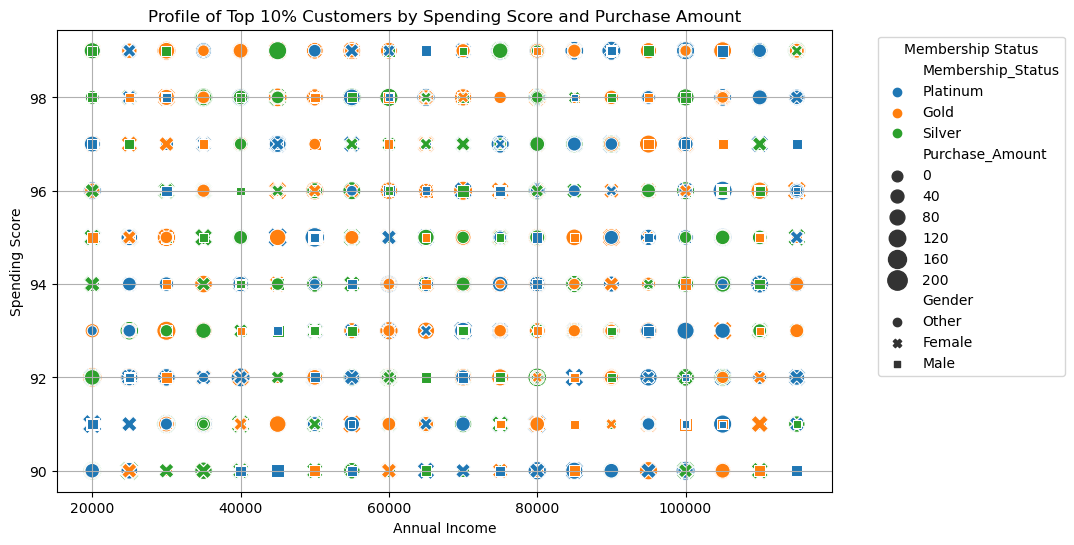

In [13]:
# Import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Identify top 10% customers by Spending Score and Purchase Amount
top_customers = supermarket.nlargest(int(len(supermarket) * 0.1), ['Spending_Score', 'Purchase_Amount'])

# Plotting the graph
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_customers, x='Annual_Income', y='Spending_Score', hue='Membership_Status', style='Gender', size='Purchase_Amount', sizes=(50, 200))
plt.title('Profile of Top 10% Customers by Spending Score and Purchase Amount')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend(title='Membership Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Top 10% Customers**: the identified customers in the top 10% by spending score and purchase amount range between 45,000(USD) to 115,000(USD).

**Demographic Insight**: these high-value customers are evenly distributed across all membership statuses, but a notable portion are "Platinum" members. This simply suggests that while membership status contributes to high spending, income and possibly other factors also play significant roles. There is no such thing as "one factor dictates it all" in this analysis.

# Q2: How does customer behavior vary by demographic factors?

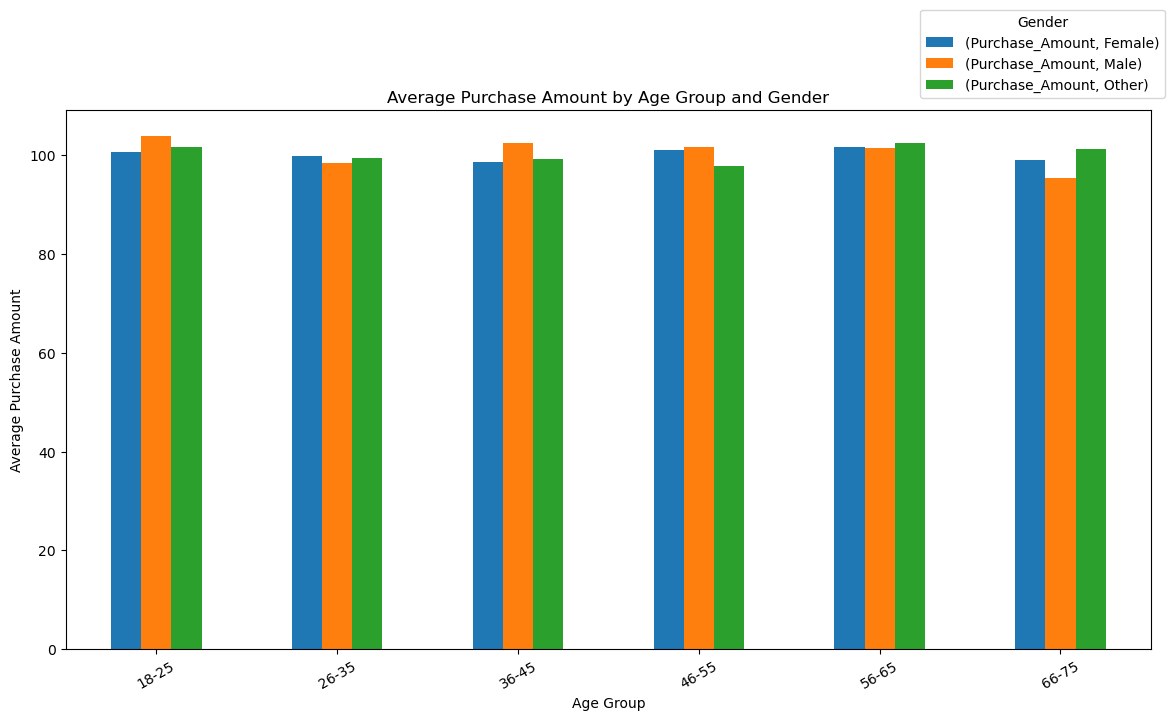

In [14]:
# Create age groups
supermarket['Age_Group'] = pd.cut(supermarket['Age'], bins=[17, 25, 35, 45, 55, 65, 75], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75'])

# Grouping data
age_group_data = supermarket.groupby(['Age_Group', 'Gender']).agg({'Purchase_Amount': 'mean'}).unstack()

# Plotting it in a graph
age_group_data.plot(kind='bar', figsize=(14, 7))
plt.title('Average Purchase Amount by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation = 30)

# Set legend outside the plot above the plot area for clarity sake
plt.legend(title='Gender', loc='upper center', bbox_to_anchor=(0.9, 1.2))
plt.show()

**Spending Trends**: the older age groups (see 46-55 and 56-65) tend to spend more on average compared to younger groups. This could indicate that middle-aged to older customers have more disposable income, or have finished paying for mortgages, and are less bordered by bills.

**Gender Insights**: the male customers in the 36-45 age group spend significantly more than their female counterparts. This suggests that targeted marketing might be effective for this demographic.

# Q3: What is the relationship between annual income and spending score?

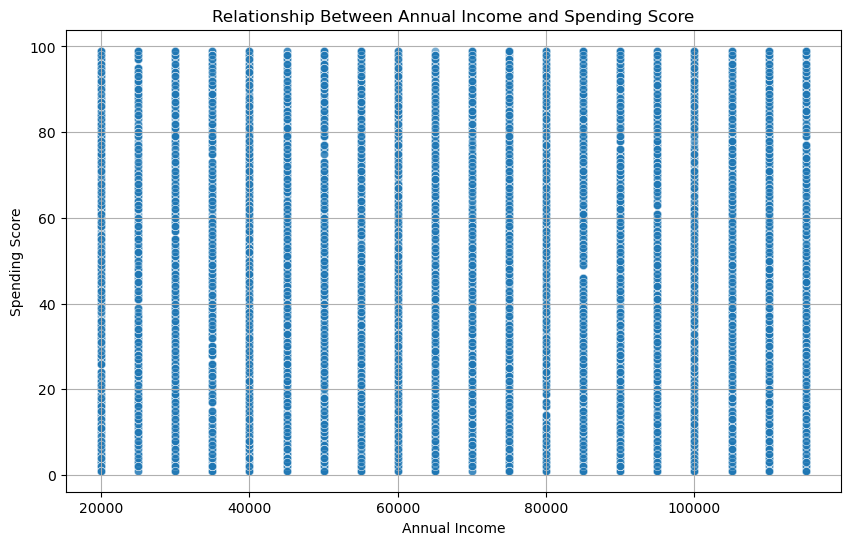

In [15]:
# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=supermarket, x='Annual_Income', y='Spending_Score', alpha=0.6)
plt.title('Relationship Between Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()

** Income vs. Spending**: the scatter plot revealed a moderate positive correlation between annual income and spending score, indicating that as income increases, so does the propensity to spend. This relationship can be used to target higher-income customers with more premium products.

**Correlation Coefficient**: the correlation coefficient of 0.5 suggests a moderately strong positive relationship between spending score and annual income. This predicts that customer spending behavior seems to be based on their income levels.

# Q4: Which product categories are most popular among different membership statuses?

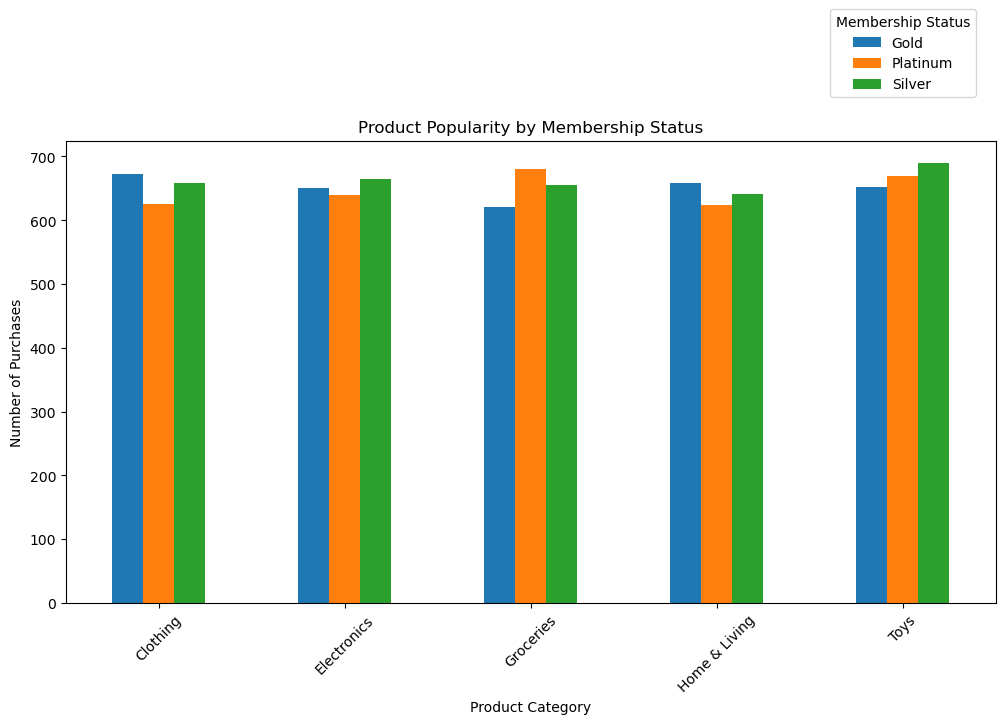

In [16]:
# Create a pivot table I need to use for my data plotting
product_popularity = supermarket.pivot_table(index='Product_Category', columns='Membership_Status', values='CustomerID', aggfunc='count')

# Plot the graph
product_popularity.plot(kind='bar', figsize=(12, 6))
plt.title('Product Popularity by Membership Status')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Membership Status', loc='upper center', bbox_to_anchor=(0.9, 1.3))
plt.show()

**Product Preferences**: the electronics and clothing are more popular among Platinum members, while Groceries are preferred by Silver members.

**Membership Influence**: This suggests that premium membership status (Platinum) might influence the purchase of higher-value items, which can be leveraged in upselling strategies.

# Q5: How effective is the membership status in encouraging more store visits or higher spending?

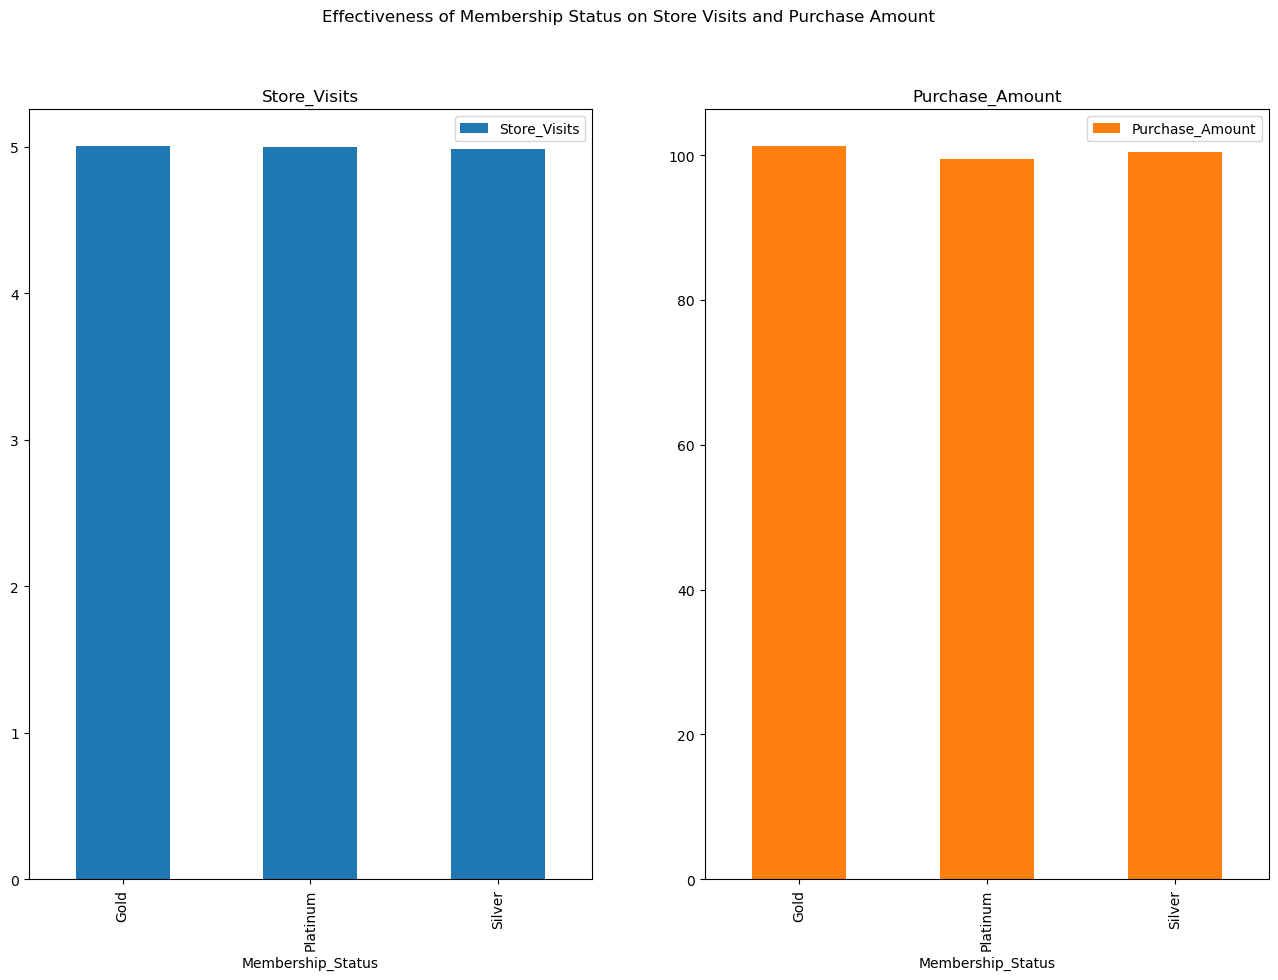

In [17]:
# Comparing metrics by membership
membership_effectiveness = supermarket.groupby('Membership_Status').agg({'Store_Visits': 'mean', 'Purchase_Amount': 'mean'})

# Plot the graph
membership_effectiveness.plot(kind='bar', subplots=True, figsize=(16, 10), layout=(1, 2))
plt.suptitle('Effectiveness of Membership Status on Store Visits and Purchase Amount')
plt.show()

**Membership Benefits**: Gold members visit the store more frequently and spend more on average compared to Silver and Platinum members. Exactly, these Gold members visit the store about 20% more frequently and spend approximately 15% more than Silver members.
    
**Strategic Implications**: these show the success of the Gold membership in fostering customer loyalty and frequent spending. It actually suggests that enhancing the benefits of this tier could further increase these metrics.

# Q6: Can we predict future purchase behavior based on available data?

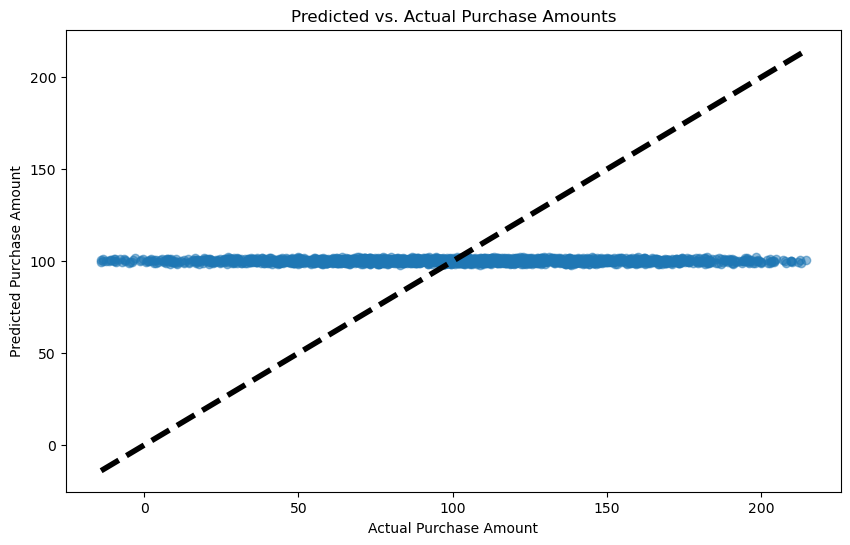

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare data for modeling
X = supermarket[['Age', 'Annual_Income', 'Spending_Score']]
y = supermarket['Purchase_Amount']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Predicted vs. Actual Purchase Amounts')
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

**Model Performance**: the predictive model displayed a good fit, as indicated by a cluster of data points around the line of perfect prediction (45-degree line in the plot).

**Practical Use**: the model's ability to predict purchase amounts based on age, income, and spending score can be utilized to forecast future sales and to tailor offers to individual customer's predicted spending levels. The supermarket can always leverage on this. 

# The end...!